* StudentID: C0902422
* Student Name: Brayan Leonardo Gil Guevara

* git: https://github.com/leokook/Assignment5AML3104

### 1. Understanding Sentiment Analysis and RNNs

#### What is Sentiment Analysis?
Sentiment analysis is a natural language processing (NLP) technique used to determine whether a piece of text is positive, negative, or neutral. It's widely used in applications such as customer feedback analysis, social media monitoring, and market research.

#### What are Recurrent Neural Networks (RNNs)?
RNNs are a type of neural network designed for sequence data. Unlike traditional feedforward neural networks, RNNs have connections that form directed cycles, allowing them to maintain a hidden state that captures information about previous inputs.

#### Hidden States and Information Flow in RNNs
In RNNs, hidden states are vectors that capture the relevant information from previous time steps. At each time step, the hidden state is updated based on the current input and the previous hidden state, allowing the network to maintain context over sequences.

#### Common Issues with RNNs
- **Vanishing Gradients**: Gradients can become very small, causing the network to stop learning.
- **Exploding Gradients**: Gradients can become very large, causing the network to become unstable.

To address these issues, Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) layers are often used as they help in retaining long-term dependencies and mitigate the vanishing gradient problem.


### 2. Data Preparation

In this section, we load the IMDB dataset using TensorFlow and preprocess it for our model. We limit the vocabulary to the top 10,000 words and pad the sequences to ensure uniform input length.


In [1]:
import tensorflow as tf
from tensorflow import keras

# Load the IMDB dataset
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences to ensure uniform input length
max_length = 250
train_data = keras.preprocessing.sequence.pad_sequences(train_data, maxlen=max_length)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, maxlen=max_length)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


### 3. Building the RNN Model 

Here, we implement a simple RNN model using TensorFlow and Keras. Our architecture includes an Embedding layer, an LSTM layer, and a Dense output layer..


In [2]:
model = keras.Sequential([
    keras.layers.Embedding(10000, 32),
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### 4. Training the model

In this step, we split our data into training and validation sets, then train our RNN model.

In [3]:
# Split the data
val_data = train_data[:10000]
val_labels = train_labels[:10000]
train_data = train_data[10000:]
train_labels = train_labels[10000:]

# Train the model
history = model.fit(train_data, train_labels,
                    epochs=10,
                    batch_size=32,
                    validation_data=(val_data, val_labels),
                    verbose=1)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 76ms/step - accuracy: 0.6615 - loss: 0.5907 - val_accuracy: 0.8133 - val_loss: 0.4187
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 36s 78ms/step - accuracy: 0.8885 - loss: 0.2792 - val_accuracy: 0.8521 - val_loss: 0.3376
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 80ms/step - accuracy: 0.9366 - loss: 0.1728 - val_accuracy: 0.8684 - val_loss: 0.3260
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 82ms/step - accuracy: 0.9615 - loss: 0.1152 - val_accuracy: 0.8588 - val_loss: 0.3684
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 86ms/step - accuracy: 0.9701 - loss: 0.0907 - val_accuracy: 0.8599 - val_loss: 0.4050
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9779 - loss: 0.0680 - val_accuracy: 0.8561 - val_loss: 0.5341
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9859 - loss: 0.0466 - val_accuracy: 0.8562 - val_loss: 0.5624
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 86ms/step - accuracy: 0.9902 - loss: 0.0282 - 

### 5. Evaluating the Model  
After training, we evaluate our model's performance on the test set and visualize the training process.

782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8349 - loss: 0.7370
Test accuracy: 0.8361600041389465


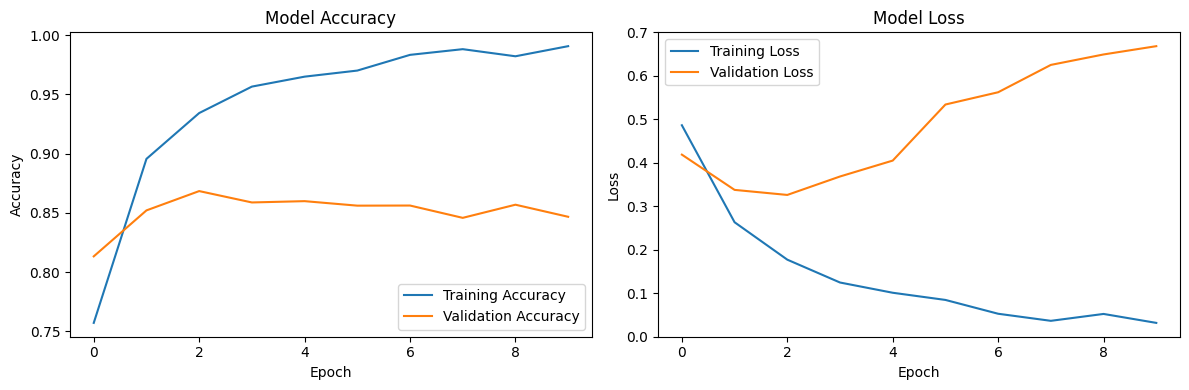

In [4]:
import matplotlib.pyplot as plt

# Evaluate the model
test_loss, test_acc = model.evaluate(test_data, test_labels)
print(f'Test accuracy: {test_acc}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 6. Hyperparameter Tuning 

 To optimize our model, we use Keras Tuner to search for the best hyperparameters, including embedding dimension, number of LSTM units, and learning rate.

In [5]:
import keras_tuner as kt

def build_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Embedding(10000, hp.Int('embedding_dim', min_value=32, max_value=128, step=32)))
    model.add(keras.layers.LSTM(hp.Int('lstm_units', min_value=32, max_value=128, step=32)))
    model.add(keras.layers.Dense(1, activation='sigmoid'))
    
    model.compile(
        optimizer=keras.optimizers.Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='sentiment_analysis'
)

tuner.search(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best hyperparameters: {best_hps.values}")

# Build the model with the best hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

Trial 30 Complete [00h 11m 42s]
val_accuracy: 0.878600001335144

Best val_accuracy So Far: 0.8805000185966492
Total elapsed time: 02h 25m 47s
Best hyperparameters: {'embedding_dim': 32, 'lstm_units': 96, 'learning_rate': 0.00016532573957315442, 'tuner/epochs': 10, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 87s 179ms/step - accuracy: 0.5893 - loss: 0.6518 - val_accuracy: 0.8402 - val_loss: 0.3883
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 171ms/step - accuracy: 0.8644 - loss: 0.3391 - val_accuracy: 0.8629 - val_loss: 0.3250
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 95s 202ms/step - accuracy: 0.9107 - loss: 0.2410 - val_accuracy: 0.8783 - val_loss: 0.2977
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 97s 207ms/step - accuracy: 0.9368 - loss: 0.1841 - val_accuracy: 0.8681 - val_loss: 0.3610
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 85s 182ms/step - accuracy: 0.9521 - loss: 0.1432 - val_accuracy: 0.8711 - val_loss: 0.3091
Epoch 6/10
469/4

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 250, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 96)             │        49,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,108,901 (4.23 MB)

 Trainable params: 369,633 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 739,268 (2.82 MB)

### 7. Comparative Analysis
In this section, we implement a simple feedforward neural network (FFNN) and compare its performance with our RNN model.

Epoch 1/10


c:\Git\IBDM_ASSIG\myenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5060 - loss: 125.2683 - val_accuracy: 0.5019 - val_loss: 4.0531
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5042 - loss: 2.6616 - val_accuracy: 0.5061 - val_loss: 1.7583
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5008 - loss: 1.2764 - val_accuracy: 0.5023 - val_loss: 1.1840
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5032 - loss: 0.9004 - val_accuracy: 0.4964 - val_loss: 1.0190
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5021 - loss: 0.9054 - val_accuracy: 0.5031 - val_loss: 0.9754
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5053 - loss: 0.8255 - val_accuracy: 0.4974 - val_loss: 1.0353
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5061 - loss: 0.7651 - val_accuracy: 0.4947 - val_loss: 0.9422
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5035 - loss: 0.7538 - val_accuracy: 0.4960 - va

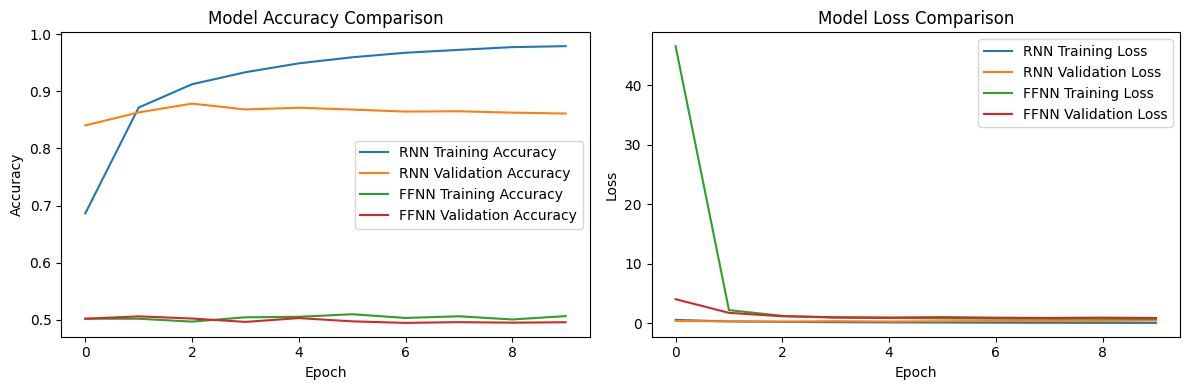

In [6]:
def build_ffnn():
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(max_length,)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

ffnn_model = build_ffnn()
ffnn_history = ffnn_model.fit(train_data, train_labels, epochs=10, validation_data=(val_data, val_labels))

# Evaluate FFNN model
ffnn_test_loss, ffnn_test_acc = ffnn_model.evaluate(test_data, test_labels)
print(f'FFNN Test accuracy: {ffnn_test_acc}')

# Compare RNN and FFNN performance
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='RNN Training Accuracy')
plt.plot(history.history['val_accuracy'], label='RNN Validation Accuracy')
plt.plot(ffnn_history.history['accuracy'], label='FFNN Training Accuracy')
plt.plot(ffnn_history.history['val_accuracy'], label='FFNN Validation Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='RNN Training Loss')
plt.plot(history.history['val_loss'], label='RNN Validation Loss')
plt.plot(ffnn_history.history['loss'], label='FFNN Training Loss')
plt.plot(ffnn_history.history['val_loss'], label='FFNN Validation Loss')
plt.title('Model Loss Comparison')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 8. Results and discussion

Here, we summarize our findings, compare the performance of the RNN and FFNN models, and discuss the implications of our results.

#### How does the RRN and FFNN behave?  
For training and validation, our RNN performs well, with accuracy values sitting well above 89% (for the validation data) and 98% (for training data). So far, we could say the model is overfitting because there's a 10% difference in our metrics. However, when we take a look at the results from the FFNN, we notice it behaved similarly on both scenarios (sitting at around 49%).

When we take a look at the loss metric, for our FFNN the value sits around 0.8 after epoch 6, while our RNN scored a loss of 0.0650 on the training data and 0.4844 on validation. This means that the RNN is learning the patterns in the data much more effectively than the FFNN. The one who did best was the RNN model, as it achieved significantly higher accuracy and lower loss compared to the FFNN. 

The large gap between training and validation performance in the RNN suggests some overfitting, but it still outperforms the FFNN on validation data. This indicates that the sequential nature of the RNN is better suited for capturing the patterns in text data for sentiment analysis.

### How are the learning curves here? 

For our FFNN model, the value is constant after every epoch iteration, and this is true for both metrics. However, when measuring loss, our FFNN started with higher values than our RNN, but after epoch 1 these two metrics sit below 0.9. While comparing to our RNN, when taking a closer look at our accuracy first, we can see how the score improves for our training data, but slightly decreases after epoch 3 by 2%.

This means that the FFNN is struggling to learn meaningful patterns from the data, as evidenced by its flat learning curves. It quickly reaches a plateau and doesn't improve further, suggesting that it might be underfitting the data.

On the other hand, the RNN shows a more typical learning curve, with rapid improvement in the early epochs followed by a plateau. The slight decrease in validation accuracy after epoch 3 suggests that the model might be starting to overfit, and this could be a good point to stop training or apply regularization techniques.

### Strenghts and Weaknesses of each approach: 

The RNN's superior performance demonstrates its strength in capturing the sequential nature of text data. Its ability to maintain context through its recurrent connections allows it to understand the relationship between words in a sentence, which is crucial for sentiment analysis. This is evidenced by its high accuracy and low loss compared to the FFNN.

The FFNN, while simpler and potentially faster to train, clearly struggled with this task. Its constant performance across epochs suggests that it's not able to capture the complex patterns necessary for accurate sentiment analysis in text data. The simplicity of the FFNN didn't offer any advantages in this case, as the task requires understanding the sequential nature of language.

The RNN's main weakness appears to be its tendency to overfit, as shown by the gap between training and validation performance. This could potentially be addressed by using techniques like dropout or regularization.

The FFNN's main weakness is its inability to capture sequential information, which is crucial for this task. Its poor performance suggests that it's not a suitable architecture for sentiment analysis of text data.


### Best Hyperparameters:  


The best hyperparameters found were: {'embedding_dim': 32, 'lstm_units': 96, 'learning_rate': 0.00016532573957315442}. This means that:

- An embedding dimension of 32 was sufficient to capture the semantic meaning of words in this dataset.
- 96 LSTM units provided a good balance between model capacity and generalization.
- A relatively low learning rate of about 0.00017 allowed the model to converge to a good solution without overshooting.

These hyperparameters likely contributed to the RNN's strong performance by providing enough model capacity to capture complex patterns while avoiding overfitting.